In [1]:
# import modules
import numpy as np
from scipy.signal import correlate
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# helper function used in notebook
def center(x):
    # centers a signal around zero
    return x - np.mean(x)

# Simple Case - Sine & Sine

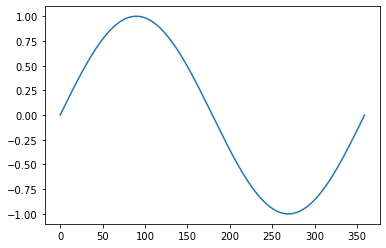

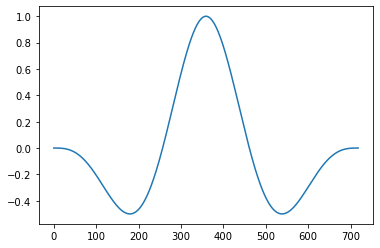

In [22]:
sine = np.sin(np.linspace(0, 2 * np.pi, 360))

corr_sine = correlate(sine, sine) / (np.linalg.norm(sine) * np.linalg.norm(sine))

plt.plot(sine)
plt.show()

plt.plot(corr_sine)
plt.show()

# Notes
Two signal conditioning requiremnts
  * 1) Center input signal at zero
  * 2) Divide the correlate() function by the length of each signal, using np.linalg.norm(), multiplied by each other

The correlation function is doing a sliding dot product. By dividing the result by the vector norms you are ending up with the cosine similarity (formula below)
$$cos(\theta) = \frac{\vec A \cdot  \vec B}{\left\| \vec A \right\| \left\| \vec B \right\|}$$

# Signal Conditioning Errors
* Attenuated Signal
* Biased Signal

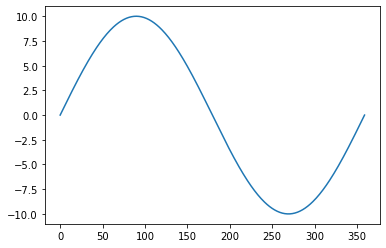

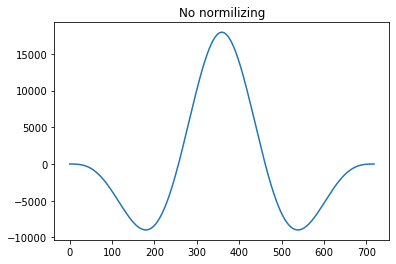

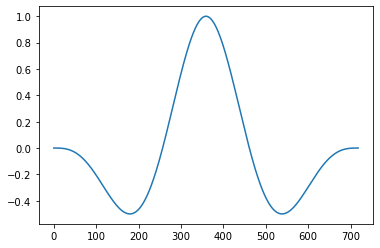

In [36]:
# Attenuated Signal
sine_10 = np.sin(np.linspace(0, 2 * np.pi, 360)) * 10

corr_sine_10         = correlate(sine_10, sine_10) / (np.linalg.norm(sine_10) * np.linalg.norm(sine_10))
corr_sine_10_no_norm = correlate(sine_10, sine_10)

plt.plot(sine_10)
plt.show()

plt.plot(corr_sine_10_no_norm)
plt.title('No normilizing')
plt.show()

plt.plot(corr_sine_10)
plt.show()

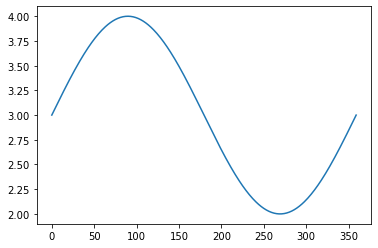

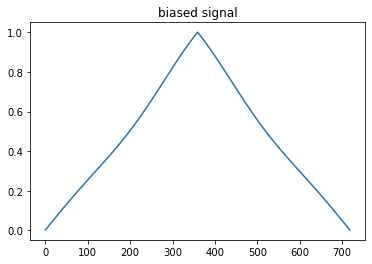

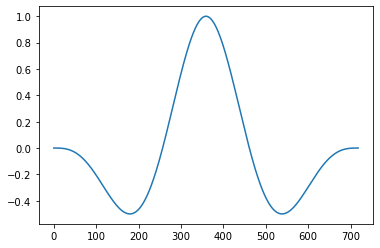

In [37]:
# biased signal
sine_biased = np.sin(np.linspace(0, 2 * np.pi, 360)) + 3

sine_biased_centered = center(sine_biased)

corr_sine_biased          = correlate(sine_biased, sine_biased) / (np.linalg.norm(sine_biased) * np.linalg.norm(sine_biased))
corr_sine_biased_centered = correlate(sine_biased_centered, sine_biased_centered) / (np.linalg.norm(sine_biased_centered) * np.linalg.norm(sine_biased_centered))

plt.plot(sine_biased)
plt.show()

plt.plot(corr_sine_biased)
plt.title('biased signal')
plt.show()

plt.plot(corr_sine_biased_centered)
plt.show()

# Correlation Cases
* Half Sine & Half Sine
* Sine with many cycles
* Sine with phase shift
* Sine & Cosine

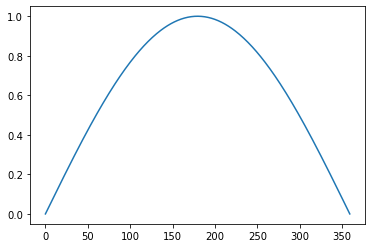

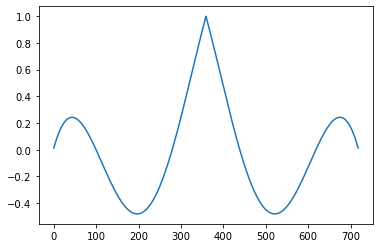

In [41]:
# Half Sine and Half Sine
sine_half = np.sin(np.linspace(0, np.pi, 360))

sine_half_centered = center(sine_half)

corr_sine_half = correlate(sine_half_centered, sine_half_centered) / (np.linalg.norm(sine_half_centered) * np.linalg.norm(sine_half_centered))

plt.plot(sine_half)
plt.show()

plt.plot(corr_sine_half)
plt.show()

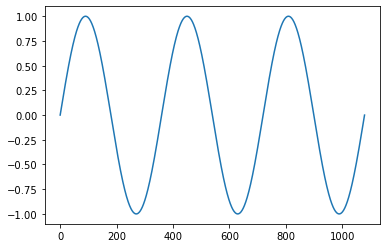

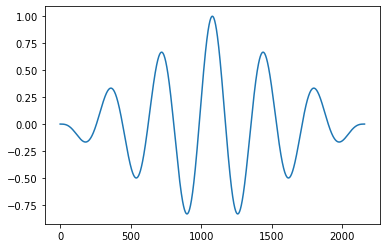

In [29]:
# sine with many cycles
sine_many = np.sin(np.linspace(0, 6 * np.pi, 1080))

corr_sine_many = correlate(sine_many, sine_many) / (np.linalg.norm(sine_many) * np.linalg.norm(sine_many))

plt.plot(sine_many)
plt.show()

plt.plot(corr_sine_many)
plt.show()

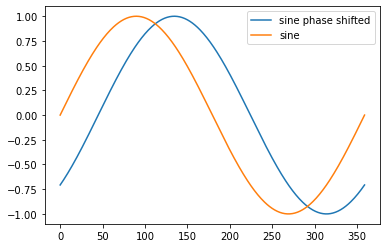

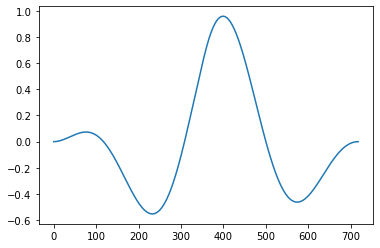

In [40]:
# sine with phase shift
sine_shift = np.sin(np.linspace(-np.pi/4, -np.pi/4 + 2 * np.pi, 360))

corr_sine_shift = correlate(sine_shift, sine) / (np.linalg.norm(sine_shift) * np.linalg.norm(sine))

plt.plot(sine_shift)
plt.plot(sine)
plt.legend(['sine phase shifted', 'sine'])
plt.show()

# notice that the correlation plot isn't symetric
plt.plot(corr_sine_shift)
plt.show()

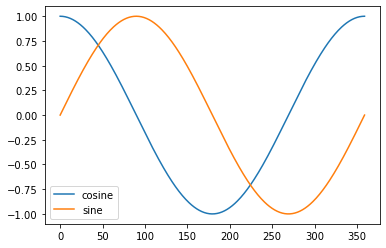

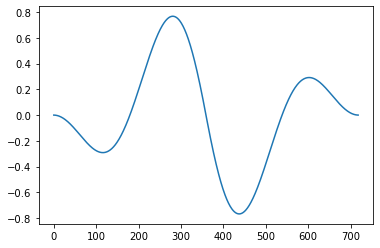

In [39]:
# sine with cosine
# a special case of sine with phase shift
cosine = np.cos(np.linspace(0, 2 * np.pi, 360))

corr_cosine = correlate(cosine, sine) / (np.linalg.norm(cosine) * np.linalg.norm(sine))

plt.plot(cosine)
plt.plot(sine)
plt.legend(['cosine', 'sine'])
plt.show()

plt.plot(corr_cosine)
plt.show()